In [2]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # 이미지 출력
import matplotlib.patches as patches # 도형 그리기

from bs4 import BeautifulSoup


In [11]:
def generate_list(xml_path):
    f=open(xml_path,'rt',encoding='UTF-8')
    soup=BeautifulSoup(f,"lxml")
    bicycle_list=soup.find_all("box",label="bicycle")
    
    img_list=[]
    for i in range(len(bicycle_list)):
        img_list.append(bicycle_list[i].parent)
        
    return img_list, bicycle_list


In [12]:
def generate_box(obj):
    xtl=float(obj['xtl'])
    ytl=float(obj['ytl'])
    xbr=float(obj['xbr'])
    ybr=float(obj['ybr'])
    
    return [xtl,ytl,xbr,ybr]

In [13]:
def plot_image(img,bicycle):
    img_path='C:/Users/mike5/Desktop/인도 보행 영상/바운딩박스/Bbox_0001/'+img["name"]
    box=generate_box(bicycle)
       
    img=mpimg.imread(img_path)
    fig,ax=plt.subplots(1)
    ax.imshow(img)
    
    xtl,ytl,xbr,ybr=box
    rect=patches.Rectangle((xtl,ytl),(xbr-xtl),(ybr-ytl),linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()

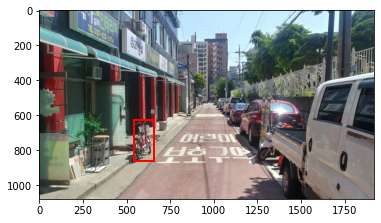

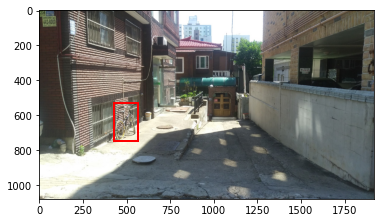

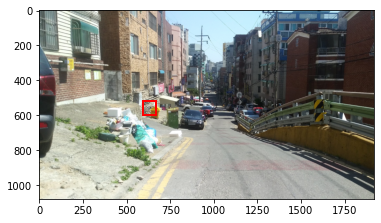

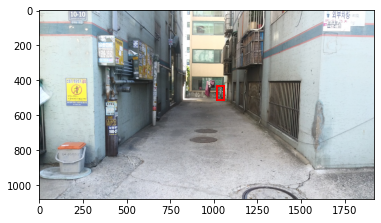

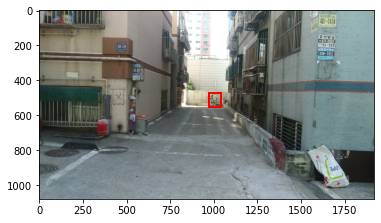

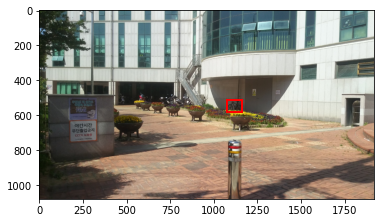

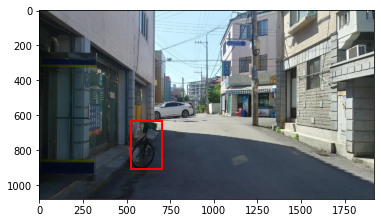

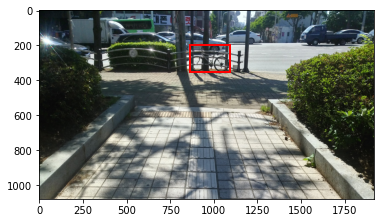

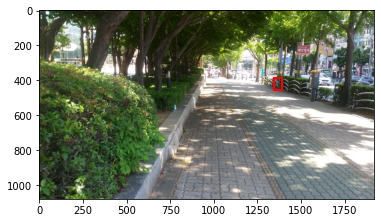

In [56]:
xml_path='C:/Users/mike5/Desktop/인도 보행 영상/바운딩박스/Bbox_0001/0617_01.xml'
img_list,bicycle_list=generate_list(xml_path)

for i in range(len(img_list)):
    plot_image(img_list[i],bicycle_list[i])


In [59]:
import random
import numpy as np
import shutil


9

In [15]:
s=r'C:/Users/mike5/Desktop/인도 보행 영상/바운딩박스/Bbox_'
xml_list=[]
for i in range(101,151):
    path=s+str(i).zfill(4)+"/*.xml"
    file=glob.glob(path)
    xml_list.append(file[0]) #경로당 xml파일 1개이기때문
    
count=0
for i in range(len(xml_list)):
    path=xml_list[i]
    img_list,bicycle_list=generate_list(path)
    count+=len(img_list)

count

2188

In [4]:
s=r'C:/Users/mike5/Desktop/인도 보행 영상/바운딩박스/Bbox_'
path=s+str(3).zfill(4)+"/*.xml"

xml_list=glob.glob(path)
xml_list

['C:/Users/mike5/Desktop/인도 보행 영상/바운딩박스/Bbox_0003\\0617_04.xml']